## Import GeoJson and read map data

NOTE THAT THE DATA USED IS ONLY FOR PEOPLE WHO ARE FULL VACCINATED EXCLUDING BOOSTERS AS OF MAY 10, 2023

In [32]:
import geopandas as gpd
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
import requests
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
# Replace Shapefile (part of geopandas)
shapefile_path = 'ne_10m_admin_1_states_provinces.shp'

# Read the Shapefile
gdf = gpd.read_file(shapefile_path)

# read GeoJSON file
output_geojson_path = 'output.geojson'

# Save as GeoJSON to load in later
gdf.to_file(output_geojson_path, driver='GeoJSON')

In [3]:
# Load the GeoJSON file for US states
fp = "output.geojson"
map_df = gpd.read_file(fp)

us_df = map_df.loc[map_df['iso_a2'] == 'US', :]

us_df.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
1235,Admin-1 states provinces,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1237,Admin-1 states provinces,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-117.03815 48.99251, -116.93818 48.9..."
1238,Admin-1 states provinces,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-116.04816 48.99251, -115.83913 48.9..."
1241,Admin-1 states provinces,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-104.04757 48.99262, -103.96949 48.9..."
1243,Admin-1 states provinces,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-97.22609 48.99267, -97.15538 48.992..."


## Import Election results and plot election results on map

In [151]:
# extract election results and data clean

election_path = "../Resources/2020ElectionResults.xlsx"

# skip titles row
election_data = pd.read_excel(election_path, skiprows = 0)


# rename columns for better readibility
election_data = election_data.rename(columns = {"TOTAL VOTES": 'Total Votes',
                                                "Votes": "Democrat Votes",
                                                "%": 'Democrat EV %',
                                                "EV": "Democrat EV",
                                                "Votes.1": "Republican Votes",
                                                "%.1": "Republican EV %",
                                                "EV.1": "Replican EV",
                                                "Votes.2": "Other Votes",
                                                "%.2": "Other EV %",
                                                "EV.2": "Other EV"})

# fills NaNs as 0s so I can sum properly due to Maine and Nebraska (can't remove NaN or else it removes everything)
election_data = election_data.fillna(0)

state_names = []

# create a list of states to map later
for index, rows in election_data.iterrows():
    state_names.append(rows['STATE'])


election_data


,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,0.3657,0.0,1441170,0.6203,9.0,32488,0.0140,0.0
1,Alaska,359530,153778,0.4277,0.0,189951,0.5283,3.0,15801,0.0439,0.0
2,Arizona,3387326,1672143,0.4936,11.0,1661686,0.4906,0.0,53497,0.0158,0.0
3,Arkansas,1219069,423932,0.3478,0.0,760647,0.6240,6.0,34490,0.0283,0.0
4,California,17500881,11110250,0.6348,55.0,6006429,0.3432,0.0,384202,0.0220,0.0
5,Colorado,3256952,1804352,0.5540,9.0,1364607,0.4190,0.0,87993,0.0270,0.0
6,Connecticut,1824280,1080680,0.5924,7.0,715291,0.3921,0.0,28309,0.0155,0.0
7,Delaware,504010,296268,0.5878,3.0,200603,0.3980,0.0,7139,0.0142,0.0
8,District of Columbia,344356,317323,0.9215,3.0,18586,0.0540,0.0,8447,0.0245,0.0
9,Florida,11067456,5297045,0.4786,0.0,5668731,0.5122,29.0,101680,0.0092,0.0


In [155]:
# create a new copy so I can mess with it
clean_data = election_data.copy(deep=True)

# we have to set some values to 0 such as CD-1, CD-2, CD-3 because these congressional districts will double count our total votes
for index, rows in clean_data.iterrows():
    if (rows['STATE'] == 'CD-1') | (rows['STATE'] == 'CD-2') | (rows['STATE'] == 'CD-3'):
        clean_data.loc[index,['Total Votes', 'Democrat Votes', 'Democrat EV %', 'Republican Votes', 'Republican EV %', 'Other Votes', 'Other EV %', 'Other EV']] = 0
    
#create a list of colors (red or blue) to show visually on map later
blue_states = [] # democrat states
red_states = [] # republican states
totals = clean_data.sum()
clean_data.loc[len(clean_data)] = totals

# create a loop that will create a new totals series... but we will need to fix some values as not all values are simply sums such as Democrat/Republican EV %
for index, rows in clean_data.iterrows():   
    if (index == 56):
        clean_data.loc[index,['STATE']] = 'Totals'
        
        # fix democrat data visual
        democrat_percent = (clean_data.at[index,'Democrat Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Democrat EV %'] = democrat_percent
        clean_data['Democrat EV %'] = clean_data['Democrat EV %'] * 100
        
        # fix republican data visual
        republican_percent = (clean_data.at[index,'Republican Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Republican EV %'] = republican_percent
        clean_data['Republican EV %'] = clean_data['Republican EV %'] * 100
        
        # fix other data visual
        other_percent = (clean_data.at[index,'Other Votes'] / clean_data.at[index,'Total Votes'])
        clean_data.at[index,'Other EV %'] = other_percent
        clean_data['Other EV %'] = clean_data['Other EV %'] * 100
        
    else:    
        # if democrat wins
        if (rows['Democrat EV %'] > rows['Republican EV %']):
            blue_states.append(rows['STATE'])
        elif (rows['Democrat EV %'] < rows['Republican EV %']):
            red_states.append(rows['STATE'])

clean_data

,STATE,Total Votes,Democrat Votes,Democrat EV %,Democrat EV,Republican Votes,Republican EV %,Replican EV,Other Votes,Other EV %,Other EV
0,Alabama,2323282,849624,36.570000,0.0,1441170,62.030000,9.0,32488,1.400000,0.0
1,Alaska,359530,153778,42.770000,0.0,189951,52.830000,3.0,15801,4.390000,0.0
2,Arizona,3387326,1672143,49.360000,11.0,1661686,49.060000,0.0,53497,1.580000,0.0
3,Arkansas,1219069,423932,34.780000,0.0,760647,62.400000,6.0,34490,2.830000,0.0
4,California,17500881,11110250,63.480000,55.0,6006429,34.320000,0.0,384202,2.200000,0.0
5,Colorado,3256952,1804352,55.400000,9.0,1364607,41.900000,0.0,87993,2.700000,0.0
6,Connecticut,1824280,1080680,59.240000,7.0,715291,39.210000,0.0,28309,1.550000,0.0
7,Delaware,504010,296268,58.780000,3.0,200603,39.800000,0.0,7139,1.420000,0.0
8,District of Columbia,344356,317323,92.150000,3.0,18586,5.400000,0.0,8447,2.450000,0.0
9,Florida,11067456,5297045,47.860000,0.0,5668731,51.220000,29.0,101680,0.920000,0.0


In [156]:
# create a new dataframe so it can be plotted
ev_pct_df = pd.DataFrame({'Vote percentage': [democrat_percent*100, republican_percent*100, other_percent*100],
                         'Parties': ['Democrat', 'Republican', 'Other']})

ev_pct_df = ev_pct_df.set_index('Parties')
ev_pct_df

,Vote percentage
Parties,
Democrat,51.313678
Republican,46.860967
Other,1.825356


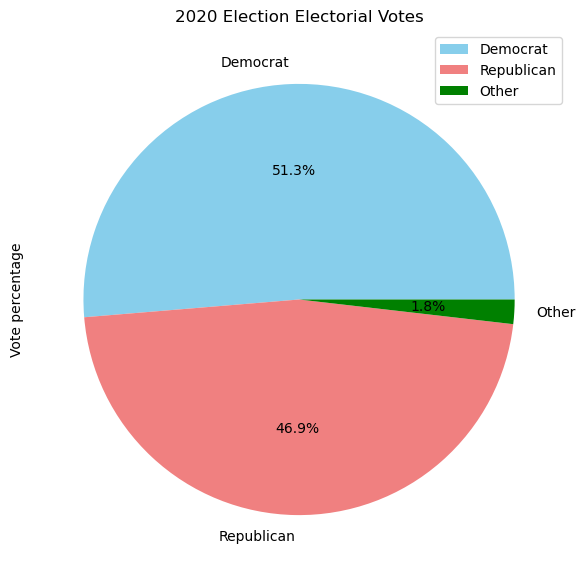

In [218]:
# plot the election results in pie chart

ev_pct_df.plot.pie(y = 'Vote percentage', autopct = '%1.1f%%', figsize = (7, 7), colors=['skyblue', 'lightcoral', 'green']) 
plt.title('2020 Election Electorial Votes')
plt.legend(loc=1)
plt.savefig('output_data/2020_election_EV')
plt.show()

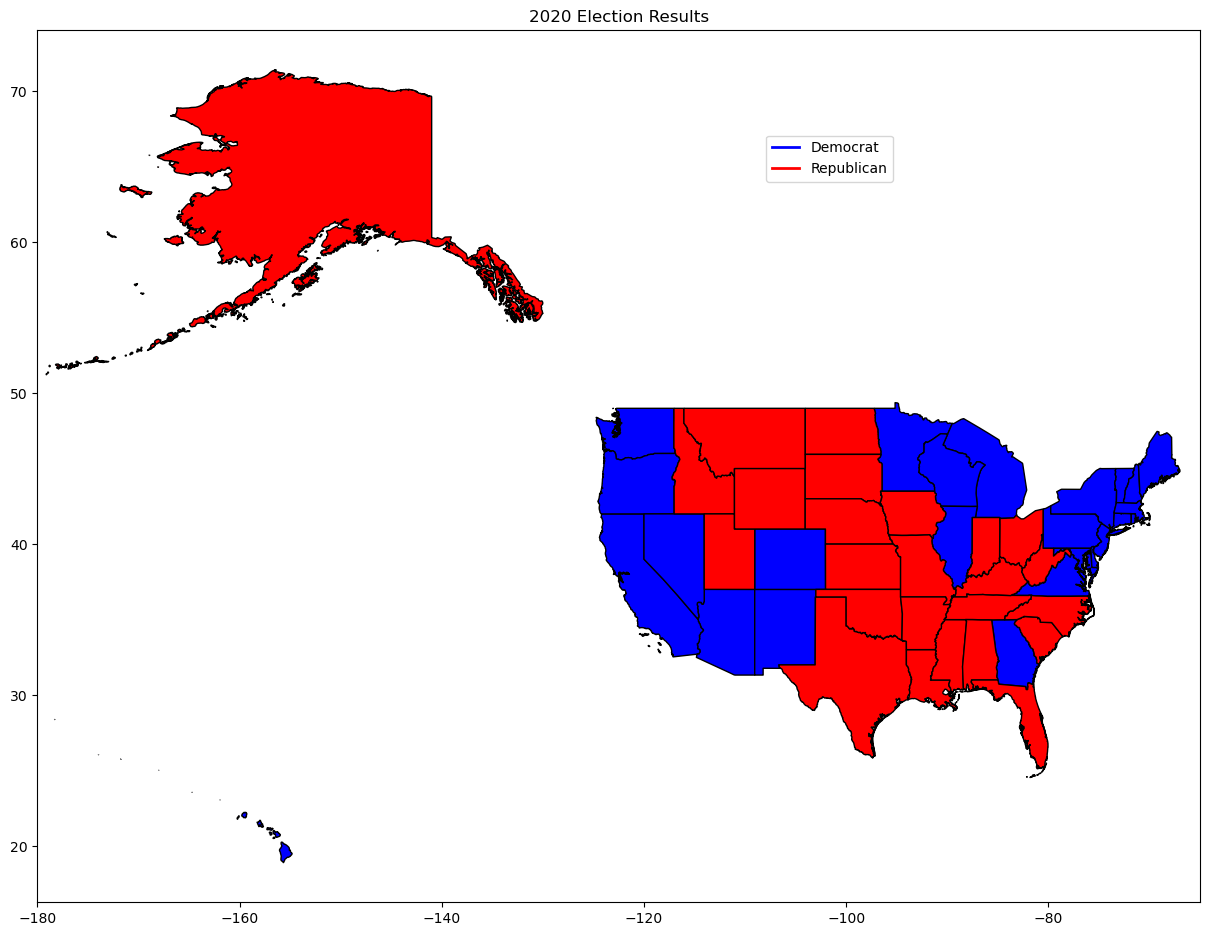

In [189]:
# create a new dictionary to store the states that voted democrat/republican

democrat_states = {'state': blue_states}
republican_states = {'state': red_states}

# create a new dataframe to store the states which we will use to compare with us_df
democrat_df = pd.DataFrame(democrat_states)
republican_df = pd.DataFrame(republican_states)

# compare the dataframes and extract the states that voted democrat and republican so I can find the geometry to plot
democrat_map = us_df[us_df['name'].isin(democrat_df['state']) == True]
republican_map = us_df[us_df['name'].isin(republican_df['state']) == True]

# Plot the map with both Democrat and Republican states
fig, ax = plt.subplots(figsize=(15, 15))

# Plot Democrat states in blue
democrat_map.plot(ax=ax, color='blue', edgecolor='black', linewidth=1,label='Democrat')

# Plot Republican states in red
republican_map.plot(ax=ax, color='red', edgecolor='black', linewidth=1,label='Republican')

# title
plt.title('2020 Election Results')

#set size
plt.xlim(-180, -65)

# Add legend
legend_handles = [Line2D([0], [0], color='blue', lw=2, label='Democrat'),
                  Line2D([0], [0], color='red', lw=2, label='Republican')]

# Add legend for the entire figure
fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(0., 0.5, 0.7, 0.22))

plt.savefig('output_data/2020_election_results_map.png', bbox_inches = 'tight')

# Show the plot
plt.show()


## Read API file

In [9]:
# grab CDC vaccination dataset
# note that this dataset is a snapshop of May 10, 2023... this is NOT a timeseries. This is AS OF MAY 10, 2023

url = 'https://data.cdc.gov/resource/8xkx-amqh.json?$query=SELECT%0A%20%20%60date%60%2C%0A%20%20%60fips%60%2C%0A%20%20%60mmwr_week%60%2C%0A%20%20%60recip_county%60%2C%0A%20%20%60recip_state%60%2C%0A%20%20%60completeness_pct%60%2C%0A%20%20%60administered_dose1_recip%60%2C%0A%20%20%60administered_dose1_pop_pct%60%2C%0A%20%20%60administered_dose1_recip_5plus%60%2C%0A%20%20%60administered_dose1_recip_5pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_12plus%60%2C%0A%20%20%60administered_dose1_recip_12pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_18plus%60%2C%0A%20%20%60administered_dose1_recip_18pluspop_pct%60%2C%0A%20%20%60administered_dose1_recip_65plus%60%2C%0A%20%20%60administered_dose1_recip_65pluspop_pct%60%2C%0A%20%20%60series_complete_yes%60%2C%0A%20%20%60series_complete_pop_pct%60%2C%0A%20%20%60series_complete_5plus%60%2C%0A%20%20%60series_complete_5pluspop_pct%60%2C%0A%20%20%60series_complete_5to17%60%2C%0A%20%20%60series_complete_5to17pop_pct%60%2C%0A%20%20%60series_complete_12plus%60%2C%0A%20%20%60series_complete_12pluspop_pct%60%2C%0A%20%20%60series_complete_18plus%60%2C%0A%20%20%60series_complete_18pluspop_pct%60%2C%0A%20%20%60series_complete_65plus%60%2C%0A%20%20%60series_complete_65pluspop_pct%60%2C%0A%20%20%60booster_doses%60%2C%0A%20%20%60booster_doses_vax_pct%60%2C%0A%20%20%60booster_doses_5plus%60%2C%0A%20%20%60booster_doses_5plus_vax_pct%60%2C%0A%20%20%60booster_doses_12plus%60%2C%0A%20%20%60booster_doses_12plus_vax_pct%60%2C%0A%20%20%60booster_doses_18plus%60%2C%0A%20%20%60booster_doses_18plus_vax_pct%60%2C%0A%20%20%60booster_doses_50plus%60%2C%0A%20%20%60booster_doses_50plus_vax_pct%60%2C%0A%20%20%60booster_doses_65plus%60%2C%0A%20%20%60booster_doses_65plus_vax_pct%60%2C%0A%20%20%60second_booster_50plus%60%2C%0A%20%20%60second_booster_50plus_vax_pct%60%2C%0A%20%20%60second_booster_65plus%60%2C%0A%20%20%60second_booster_65plus_vax_pct%60%2C%0A%20%20%60svi_ctgy%60%2C%0A%20%20%60series_complete_pop_pct_svi%60%2C%0A%20%20%60series_complete_5pluspop_pct_svi%60%2C%0A%20%20%60series_complete_5to17pop_pct_svi%60%2C%0A%20%20%60series_complete_12pluspop_pct_svi%60%2C%0A%20%20%60series_complete_18pluspop_pct_svi%60%2C%0A%20%20%60series_complete_65pluspop_pct_svi%60%2C%0A%20%20%60metro_status%60%2C%0A%20%20%60series_complete_pop_pct_ur_equity%60%2C%0A%20%20%60series_complete_5pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_5to17pop_pct_ur_equity%60%2C%0A%20%20%60series_complete_12pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_18pluspop_pct_ur_equity%60%2C%0A%20%20%60series_complete_65pluspop_pct_ur_equity%60%2C%0A%20%20%60booster_doses_vax_pct_svi%60%2C%0A%20%20%60booster_doses_12plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_18plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_65plusvax_pct_svi%60%2C%0A%20%20%60booster_doses_vax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_12plusvax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_18plusvax_pct_ur_equity%60%2C%0A%20%20%60booster_doses_65plusvax_pct_ur_equity%60%2C%0A%20%20%60census2019%60%2C%0A%20%20%60census2019_5pluspop%60%2C%0A%20%20%60census2019_5to17pop%60%2C%0A%20%20%60census2019_12pluspop%60%2C%0A%20%20%60census2019_18pluspop%60%2C%0A%20%20%60census2019_65pluspop%60%2C%0A%20%20%60bivalent_booster_5plus%60%2C%0A%20%20%60bivalent_booster_5plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_12plus%60%2C%0A%20%20%60bivalent_booster_12plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_18plus%60%2C%0A%20%20%60bivalent_booster_18plus_pop_pct%60%2C%0A%20%20%60bivalent_booster_65plus%60%2C%0A%20%20%60bivalent_booster_65plus_pop_pct%60'

cdc_data = requests.get(url).json()


In [10]:
# rename the columns that I will be needing

cdc_df = pd.DataFrame(cdc_data)
cdc_df = cdc_df.rename(columns = {'recip_state': 'State Abbv.',
                                 'series_complete_pop_pct': '% of People Fully Vaccinated'})
cdc_df

,date,fips,mmwr_week,recip_county,State Abbv.,completeness_pct,administered_dose1_recip,administered_dose1_pop_pct,administered_dose1_recip_5plus,administered_dose1_recip_5pluspop_pct,...,census2019_18pluspop,census2019_65pluspop,bivalent_booster_5plus,bivalent_booster_5plus_pop_pct,bivalent_booster_12plus,bivalent_booster_12plus_pop_pct,bivalent_booster_18plus,bivalent_booster_18plus_pop_pct,bivalent_booster_65plus,bivalent_booster_65plus_pop_pct
0,2023-05-10T00:00:00.000,55129,19,Washburn County,WI,96.7,11123,70.8,11097,73.9,...,12758,4304,3978,26.5,3955,28.6,3899,30.6,2588,60.1
1,2023-05-10T00:00:00.000,19173,19,Taylor County,IA,97.3,3149,51.4,3145,55,...,4687,1392,841,14.7,841,16.3,834,17.8,588,42.2
2,2023-05-10T00:00:00.000,36059,19,Nassau County,NY,97.5,1391226,95,1384503,95,...,1065968,246690,236202,18.4,231748,19.8,224931,21.1,109947,44.6
3,2023-05-10T00:00:00.000,48281,19,Lampasas County,TX,98.9,11678,54.5,11660,57.4,...,16799,4322,1951,9.6,1947,10.5,1925,11.5,1229,28.4
4,2023-05-10T00:00:00.000,26145,19,Saginaw County,MI,94,104075,54.6,NaN,NaN,...,149676,37414,15618,8.7,15448,9.4,15112,10.1,7921,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-10T00:00:00.000,38035,19,Grand Forks County,ND,92.7,51304,73.9,50840,78.6,...,54757,9249,12654,19.6,12323,20.9,11825,21.6,5355,57.9
996,2023-05-10T00:00:00.000,28039,19,George County,MS,98.1,11726,47.9,11716,51.7,...,18022,3579,801,3.5,800,4,795,4.4,522,14.6
997,2023-05-10T00:00:00.000,24019,19,Dorchester County,MD,98.2,21870,68.5,21816,72.3,...,25219,7063,5557,18.4,5538,20.1,5475,21.7,3213,45.5
998,2023-05-10T00:00:00.000,40021,19,Cherokee County,OK,93.8,33752,69.4,33714,73.4,...,38112,8264,3430,7.5,3404,8.2,3369,8.8,1945,23.5


In [13]:
# Dictionary mapping state abbreviations to full names
# this will be used to append to dataframe so they match the us_df of states which I can then extract the geometry to plot
state_mapping = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi',
    'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada',
    'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin',
    'WV': 'West Virginia', 'WY': 'Wyoming'
}

In [14]:
# clean dataframe
# groupby state abbv so I keep the State column; this is necessary so I can merge to the us_df on = 'state'

state_df = cdc_df[['State Abbv.', '% of People Fully Vaccinated']]
state_df['% of People Fully Vaccinated'] = state_df['% of People Fully Vaccinated'].astype(float)

# drop some states that have NaN i.e.) US virgin islands because that's not a state
state_df = state_df.dropna(how = 'any')
avg_state_vax_pct = state_df.groupby('State Abbv.').mean()

# create a new column of full names of states
avg_state_vax_pct['State'] = avg_state_vax_pct.index.map(state_mapping)
avg_state_vax_pct = avg_state_vax_pct.reset_index()
avg_state_vax_pct


,State Abbv.,% of People Fully Vaccinated,State
0,AK,71.544444,Alaska
1,AL,41.686667,Alabama
2,AR,49.370588,Arkansas
3,AZ,90.550000,Arizona
4,CA,64.585714,California
5,CO,62.748000,Colorado
6,CT,80.650000,Connecticut
7,DE,59.200000,Delaware
8,FL,53.834783,Florida
9,GA,44.612500,Georgia


In [149]:
# empty lists to be appended values and create into a dataframe later
vax_republican_states = []
vax_democrat_states = []

vax_republican_state_pct = []
vax_democrat_state_pct = []

# create a loop that if the state in either democrat/republican, append their states and corresponding vax rate into a list
for index, row in avg_state_vax_pct.iterrows():
    state = row['State']
    vax_pct = row['% of People Fully Vaccinated']
   
    if state in republican_states['state']:
        vax_republican_states.append(state)
        vax_republican_state_pct.append(vax_pct)
        
    elif state in democrat_states['state']:
        vax_democrat_states.append(state)
        vax_democrat_state_pct.append(vax_pct)


In [167]:
# create a dictionary that will be used to convert into a dataframe

democrat_vax_dict = {'state': vax_democrat_states,
                    'avg vax %': vax_democrat_state_pct}
republican_vax_dict = {'state': vax_republican_states,
                      'avg vax %': vax_republican_state_pct}

# convert the dictionary into a dataframe
democrat_vax_df = pd.DataFrame(democrat_vax_dict)
republican_vax_df = pd.DataFrame(republican_vax_dict)

# create new dataframe to store the average vaccination rates for democrat/republican

print(f"The average vaccination rate by Democrat States is {democrat_vax_df['avg vax %'].mean():.2f}%")
print(f"The average vaccination rate by Republican States is {republican_vax_df['avg vax %'].mean():.2f}%")

republican_vax_df

The average vaccination rate by Democrat States is 65.38%
The average vaccination rate by Republican States is 51.80%


,state,avg vax %
0,Alaska,71.544444
1,Alabama,41.686667
2,Arkansas,49.370588
3,Florida,53.834783
4,Iowa,57.221429
5,Idaho,45.869231
6,Indiana,54.055263
7,Kansas,53.828947
8,Kentucky,50.257895
9,Louisiana,50.943750


In [175]:
# clean up the dataframe
raw_us_vax_df = pd.merge(democrat_vax_df, republican_vax_df, on = 'state', how = 'outer', suffixes=('_democrat', '_republican'))

# I created copy because I need the data of the states that fall within democrat/republican so I can plot them as red/blue
us_vax_df = raw_us_vax_df.copy()
us_vax_df['avg vax %'] = us_vax_df['avg vax %_democrat'].fillna(us_vax_df['avg vax %_republican'])
us_vax_df.drop(['avg vax %_democrat', 'avg vax %_republican'], axis=1, inplace=True)
us_vax_df

,state,avg vax %
0,Arizona,90.550000
1,California,64.585714
2,Colorado,62.748000
3,Connecticut,80.650000
4,Delaware,59.200000
5,Georgia,44.612500
6,Illinois,55.082353
7,Massachusetts,80.300000
8,Maryland,69.414286
9,Maine,84.440000


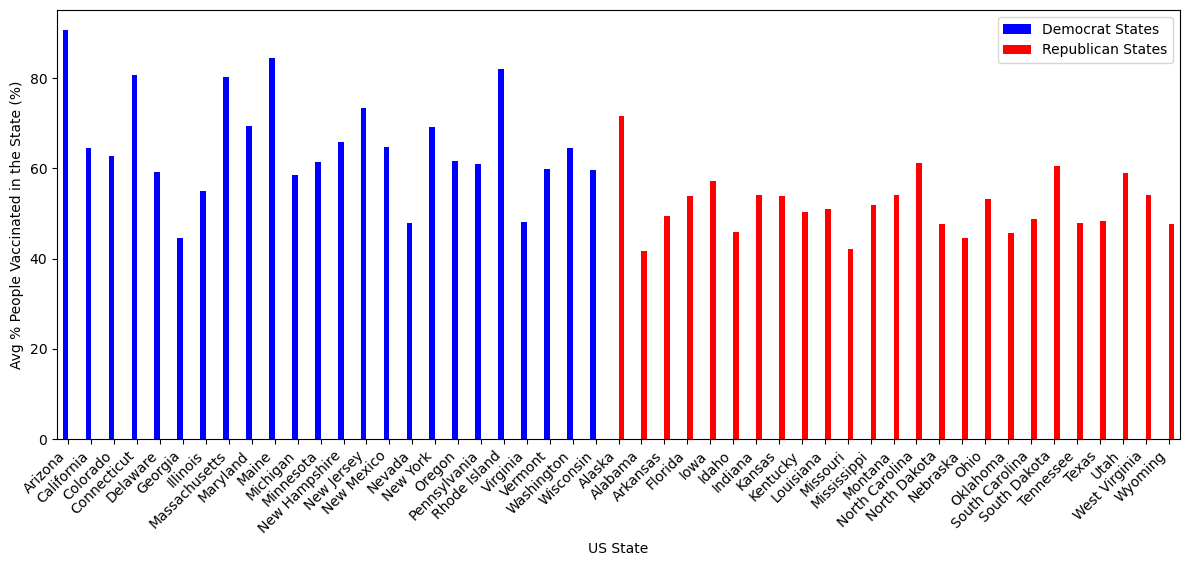

In [188]:
# create bar graph to show the vaccination rates by state and by political party

fig, ax = plt.subplots(figsize=(12, 6))

raw_us_vax_df.plot('state', ['avg vax %_democrat', 'avg vax %_republican'], kind='bar', ax=ax, color=['blue', 'red'])

plt.xticks(rotation=45, ha='right')
plt.xlabel('US State')
plt.ylabel('Avg % People Vaccinated in the State (%)')

plt.legend(labels = ['Democrat States', 'Republican States'])

plt.tight_layout(rect=(0, 0.02, 1, 0.98))
plt.savefig('output_data/Avg_State_Vax_Rate')

plt.show()

In [214]:
# create a pie chart to show the average vaccination rates

pie_vax_df = pd.DataFrame({'Parties': ['Democrat', 'Republican'],
                           '% Vaccinated': [democrat_vax_df['avg vax %'].mean(), republican_vax_df['avg vax %'].mean()],
                            '% Unvaccinated' : [100 - democrat_vax_df['avg vax %'].mean(), 100 - republican_vax_df['avg vax %'].mean()]
                          
                          })

pie_vax_df.set_index('Parties')



,% Vaccinated,% Unvaccinated
Parties,,
Democrat,65.377539,34.622461
Republican,51.796319,48.203681


In [ ]:
# create a pie chart to show the average vaccination rates

pie_democrat_vax_df = pd.DataFrame({'Parties': ['Democrat'],
                           '% Vaccinated': [democrat_vax_df['avg vax %'].mean()],
                            '% Unvaccinated' : [100 - democrat_vax_df['avg vax %'].mean()]
                          
                          })

pie_republican_vax_df = pd.DataFrame({'Parties': ['Republican'],
                           '% Vaccinated': [republican_vax_df['avg vax %'].mean()],
                            '% Unvaccinated' : [100 - republican_vax_df['avg vax %'].mean()]
                          
                          })

#pie_democrat_vax_df.set_index('Parties')
#pie_republican_vax_df.set_index('Parties')

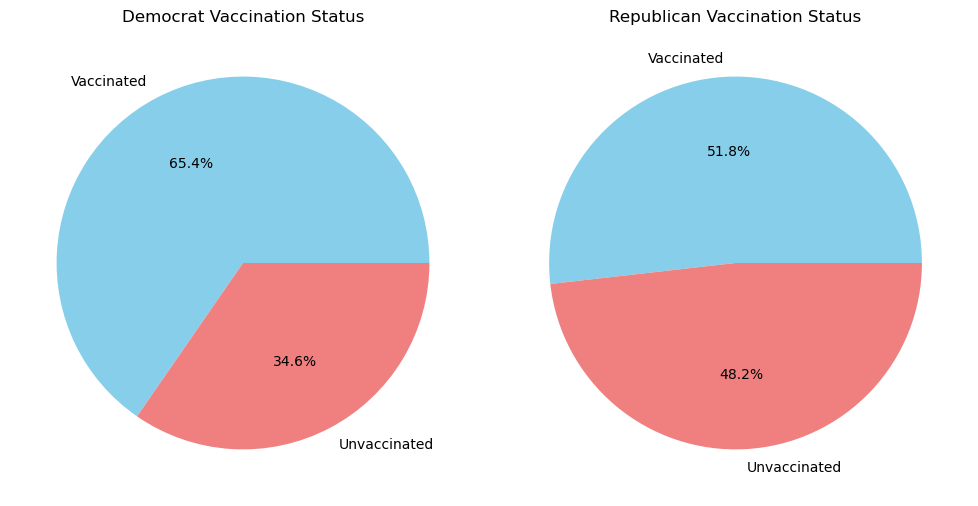

In [219]:
# create pie chart

# Plot pie chart for Democrats
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(pie_vax_df.loc[0, ['% Vaccinated', '% Unvaccinated']], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Democrat Vaccination Status')

# Plot pie chart for Republicans
plt.subplot(1, 2, 2)
plt.pie(pie_vax_df.loc[1, ['% Vaccinated', '% Unvaccinated']], labels=['Vaccinated', 'Unvaccinated'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Republican Vaccination Status')

# Adjust layout
plt.tight_layout()

# savefig
plt.savefig('output_data/Democrat_Republican_Average_Vax')

# Show the plots
plt.show()

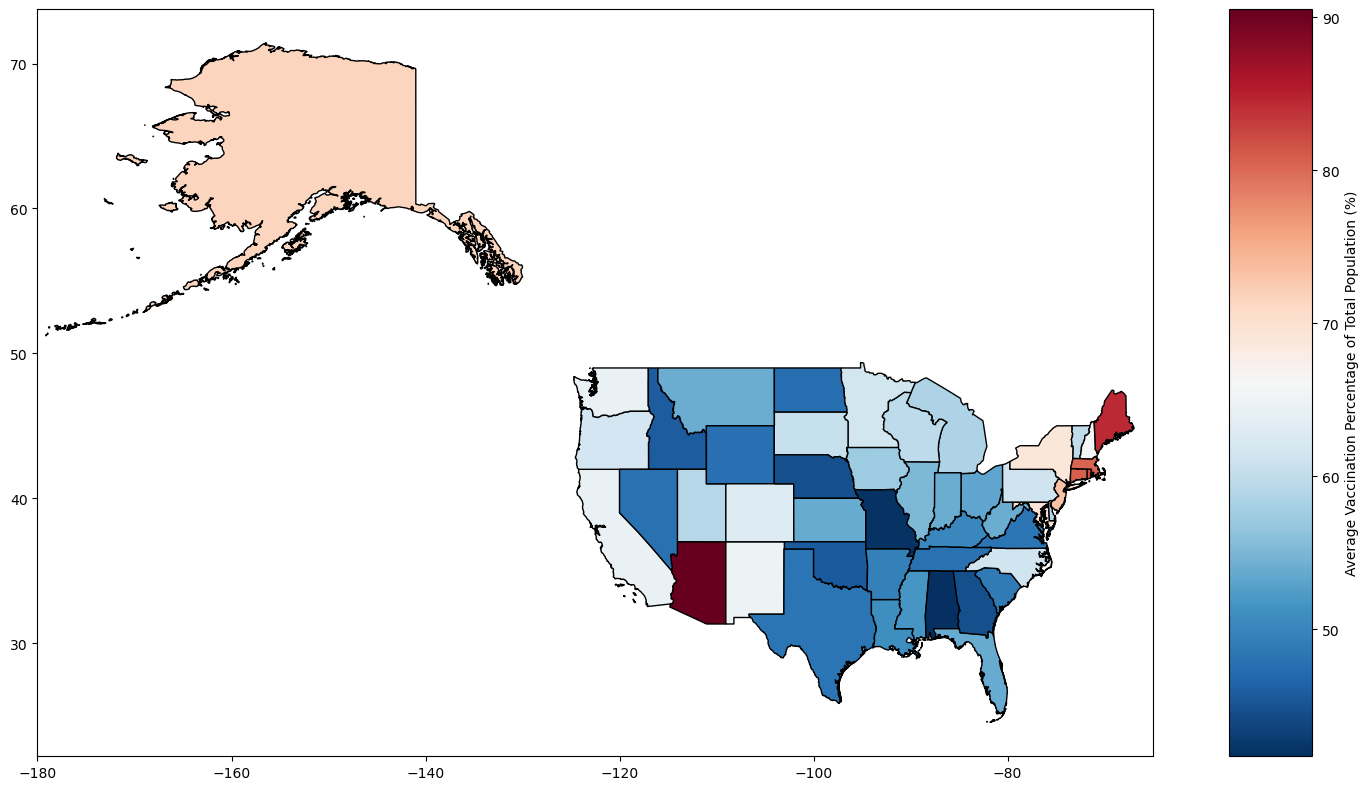

In [202]:
us_vax_map = us_df[us_df['name'].isin(us_vax_df['state']) == True]
us_vax_map = pd.merge(us_vax_map, us_vax_df[['state', 'avg vax %']], left_on='name', right_on='state', how='left')
us_vax_map.drop('state', axis=1, inplace=True)


# Plot the map with both Democrat and Republican states
fig, ax = plt.subplots(figsize=(20, 20))

us_vax_map.plot(ax=ax, column = 'avg vax %', cmap = 'RdBu_r', edgecolor = 'black')

#set size
plt.xlim(-180, -65)

# Create a ScalarMappable for colorbar
norm = Normalize(vmin=min(us_vax_map['avg vax %']), vmax=max(us_vax_map['avg vax %']))
sm = cm.ScalarMappable(cmap='RdBu_r', norm=norm)
sm.set_array([])

# Add colorbar to the right of the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-2)
cbar = plt.colorbar(sm, cax=cax, label="Average Vaccination Percentage of Total Population (%)")


# save fig
plt.savefig('output_data/avg_vax_pct.png', bbox_inches='tight')
            
# Show the plot
plt.show()

